<a href="https://colab.research.google.com/github/AndrewstheBuilder/ScratchNeuralNetworks/blob/main/Pytorch_CNN_KaggleDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!kaggle datasets download -d puneet6060/intel-image-classification
!unzip intel-image-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: seg_train/seg_train/mountain/7506.jpg  
  inflating: seg_train/seg_train/mountain/7537.jpg  
  inflating: seg_train/seg_train/mountain/7539.jpg  
  inflating: seg_train/seg_train/mountain/7551.jpg  
  inflating: seg_train/seg_train/mountain/7560.jpg  
  inflating: seg_train/seg_train/mountain/7565.jpg  
  inflating: seg_train/seg_train/mountain/7578.jpg  
  inflating: seg_train/seg_train/mountain/7581.jpg  
  inflating: seg_train/seg_train/mountain/7586.jpg  
  inflating: seg_train/seg_train/mountain/7647.jpg  
  inflating: seg_train/seg_train/mountain/7652.jpg  
  inflating: seg_train/seg_train/mountain/7654.jpg  
  inflating: seg_train/seg_train/mountain/7662.jpg  
  inflating: seg_train/seg_train/mountain/767.jpg  
  inflating: seg_train/seg_train/mountain/7672.jpg  
  inflating: seg_train/seg_train/mountain/7679.jpg  
  inflating: seg_train/seg_train/mountain/7681.jpg  
  inflating: seg_train/seg_train/mountain/7693.jp

In [28]:
import torch
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [59]:
transform = transforms.Compose(
    [ transforms.Resize((32, 32)),
      transforms.ToTensor(),
      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_data_path = './seg_train/seg_train/'
train_dataset = datasets.ImageFolder(root=train_data_path, transform=transform)

test_data_path = './seg_test/seg_test/'
test_dataset = datasets.ImageFolder(root=test_data_path, transform=transform)

In [63]:
batch_size = 4  # You can adjust the batch size based on memory availability
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

In [50]:
print('labels',labels)
classes = train_dataset.classes
print('classes',classes)

labels tensor([5, 5, 1, 1, 1, 1, 5, 3, 2, 5, 4, 0, 1, 0, 5, 3, 2, 3, 1, 3, 1, 3, 5, 4,
        3, 1, 0, 1, 3, 3, 1, 2])
classes ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


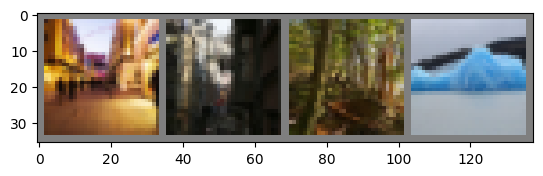

street street forest glacier


In [65]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
classes = train_dataset.classes

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [52]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [53]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
for epoch in range(20):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 32 == 31:    # print every 32 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 32:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,    32] loss: 1.366
[1,    64] loss: 1.094
[1,    96] loss: 1.140
[1,   128] loss: 1.051
[1,   160] loss: 1.040
[1,   192] loss: 0.985
[1,   224] loss: 1.099
[1,   256] loss: 1.016
[1,   288] loss: 1.018
[1,   320] loss: 0.978
[1,   352] loss: 0.921
[1,   384] loss: 0.880
[1,   416] loss: 1.090
[1,   448] loss: 1.014
[1,   480] loss: 1.014
[1,   512] loss: 0.945
[1,   544] loss: 1.152
[1,   576] loss: 1.102
[1,   608] loss: 1.088
[1,   640] loss: 1.115
[1,   672] loss: 1.302
[1,   704] loss: 1.113
[1,   736] loss: 1.077
[1,   768] loss: 1.066
[1,   800] loss: 1.159
[1,   832] loss: 1.058
[1,   864] loss: 0.980
[1,   896] loss: 0.904
[1,   928] loss: 1.020
[1,   960] loss: 1.030
[1,   992] loss: 1.051
[1,  1024] loss: 1.079
[1,  1056] loss: 1.025
[1,  1088] loss: 1.141
[1,  1120] loss: 1.121
[1,  1152] loss: 1.099
[1,  1184] loss: 0.994
[1,  1216] loss: 1.141
[1,  1248] loss: 1.063
[1,  1280] loss: 1.050
[1,  1312] loss: 0.997
[1,  1344] loss: 1.020
[1,  1376] loss: 1.005
[1,  1408] 

In [57]:
PATH = './kaggle_net.pth'
torch.save(net.state_dict(), PATH)

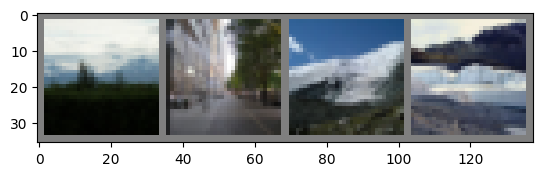

GroundTruth:  mountain street glacier glacier


In [64]:
dataiter = iter(test_loader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [66]:
net = Net()
net.load_state_dict(torch.load(PATH, weights_only=True))

<All keys matched successfully>

In [67]:
outputs = net(images)

In [68]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  street forest forest glacier


In [70]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 57 %


In [72]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: buildings is 63.4 %
Accuracy for class: forest is 76.8 %
Accuracy for class: glacier is 70.2 %
Accuracy for class: mountain is 64.8 %
Accuracy for class: sea   is 15.3 %
Accuracy for class: street is 57.9 %
